In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

%matplotlib inline

In [113]:
# Source: https://towardsdatascience.com/logistic-regression-a-simplified-approach-using-python-c4bc81a87c31
titanic = pd.read_csv("C:\\Users\\antho\\Documents\\Data Science\\Data\\titanic_train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [114]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

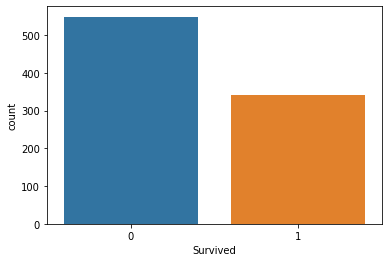

In [101]:
# Count number of survived vs. not survived
sns.countplot(x='Survived', data=titanic)

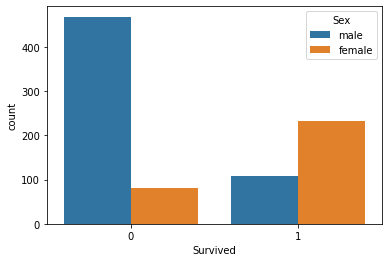

In [102]:
# Count number of survived by sex
sns.countplot(x='Survived', hue='Sex', data=titanic)

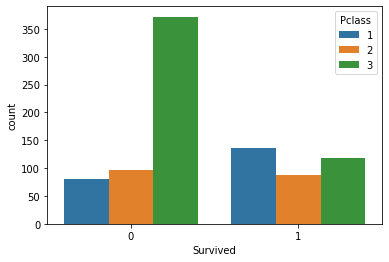

In [7]:
# Count number of survived by passenger class
sns.countplot(x='Survived', hue='Pclass', data=titanic)


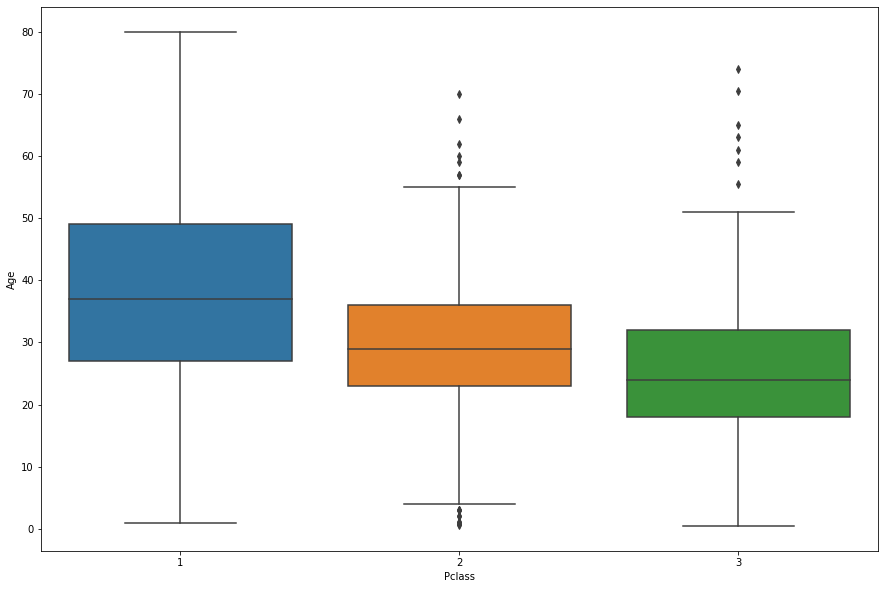

In [13]:
# Plot to get mean age by class
plt.figure(figsize=(15, 10))
sns.boxplot(x='Pclass', y='Age', data=titanic)

In [103]:
# Replace null values with mean age by class
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [77]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age, axis=1)

In [78]:
# Drop cabin column
titanic.drop('Cabin', axis=1, inplace=True)

In [117]:
titanic.drop('Embarked', axis=1, inplace=True)

In [79]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [80]:
# Check datatypes to convert categorical to numeric
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [98]:
# Dummy variables - returns dataframe
sex_dummy = pd.get_dummies(titanic['Sex'])
sex_dummy

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [126]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder_sex = LabelEncoder()

sex_label = label_encoder_sex.fit_transform(titanic['Sex'])
sex_label

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [122]:
# One Hot Encoding - returns numpy array
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)

sex_onehot = onehot_encoder.fit_transform(titanic[['Sex']])
sex_onehot

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [130]:
# Target Encoding
from category_encoders import TargetEncoder
target_encoder = TargetEncoder()

titanic['sex_target'] = target_encoder.fit_transform(titanic['Sex'], titanic['Survived'])
titanic[['Sex', 'sex_target']]

,Sex,sex_target
0,male,0.188908
1,female,0.742038
2,female,0.742038
3,female,0.742038
4,male,0.188908
...,...,...
886,male,0.188908
887,female,0.742038
888,female,0.742038
889,male,0.188908


In [138]:
# Impute median age
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
titanic['Age'] = imputer.fit_transform(titanic[['Age']])
titanic['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [81]:
# Replace with dummy variables (drop_first = True, removes first column)
sex = pd.get_dummies(titanic['Sex'])
embark = pd.get_dummies(titanic['Embarked'])

In [82]:
# Drop original columns
titanic.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [83]:
# Add new dummy columns to dataset
titanic_dummy = pd.concat([titanic, sex, embark], axis=1)
titanic_dummy.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [92]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(titanic_dummy.drop('Survived', axis=1), 
                                                    titanic_dummy['Survived'], test_size=0.25, 
                                                    random_state=1)

In [93]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

C:\Users\antho\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       128
           1       0.81      0.67      0.74        95

    accuracy                           0.79       223
   macro avg       0.80      0.78      0.78       223
weighted avg       0.80      0.79      0.79       223



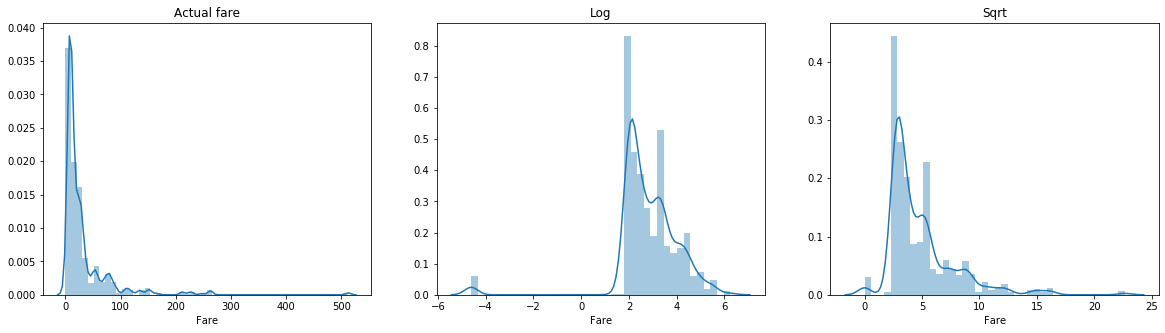

In [132]:
fare = titanic['Fare']

# Log transform fare
log_fare = np.log(fare + 0.01)

# Square root transform fare
sqrt_fare = np.sqrt(fare)

fig, ax = plt.subplots(1, 3, figsize=(20,5))

sns.distplot(fare, ax=ax[0])
ax[0].set_title("Actual fare")

sns.distplot(log_fare, ax=ax[1])
ax[1].set_title("Log")

sns.distplot(sqrt_fare, ax=ax[2])
ax[2].set_title("Sqrt")

plt.show()

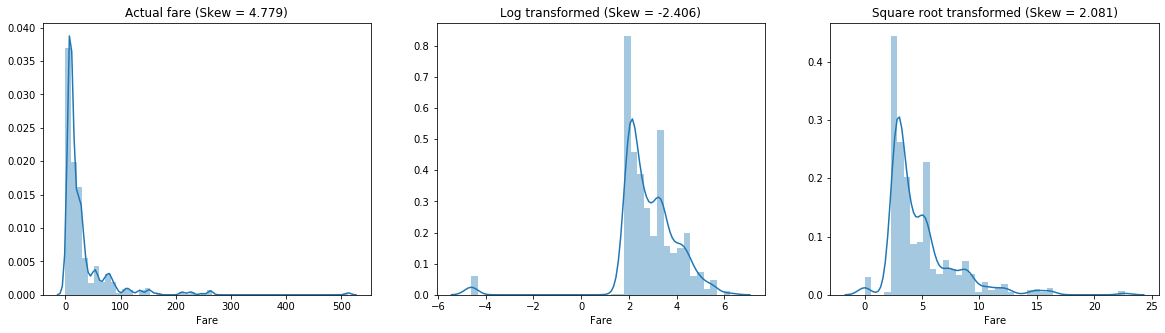

In [136]:
from scipy.stats import skew

# Skew actual fare
skew_fare = skew(fare)

# Log transform fare
log_fare = np.log(fare + 0.01)
skew_log = skew(log_fare)

# Square root transform fare
sqrt_fare = np.sqrt(fare)
skew_sqrt = skew(sqrt_fare)

fig, ax = plt.subplots(1, 3, figsize=(20,5))

sns.distplot(fare, ax=ax[0])
ax[0].set_title("Actual fare (Skew = %.3f)"%skew_fare)

sns.distplot(log_fare, ax=ax[1])
ax[1].set_title("Log transformed (Skew = %.3f)"%skew_log)

sns.distplot(sqrt_fare, ax=ax[2])
ax[2].set_title("Square root transformed (Skew = %.3f)"%skew_sqrt)

plt.show()

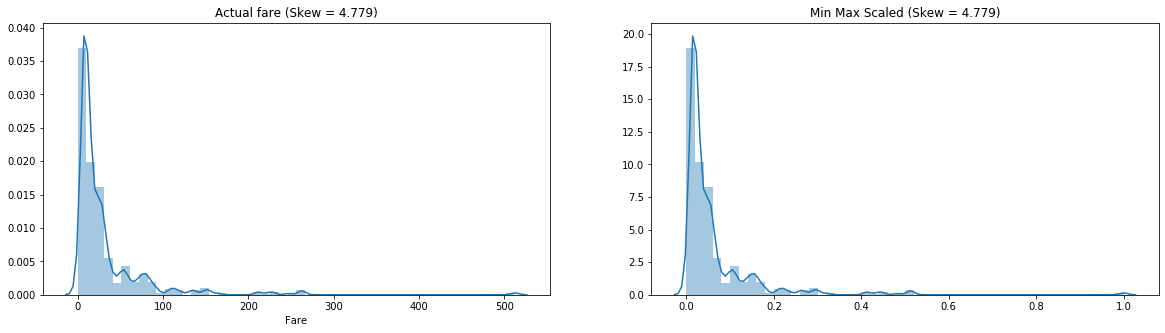

In [140]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_fare = scaler.fit_transform(titanic[['Fare']])
skew_scaled = skew(scaled_fare)

fig, ax = plt.subplots(1, 2, figsize=(20,5))

sns.distplot(fare, ax=ax[0])
ax[0].set_title("Actual fare (Skew = %.3f)"%skew_fare)

sns.distplot(scaled_fare, ax=ax[1])
ax[1].set_title("Min Max Scaled (Skew = %.3f)"%skew_scaled)

plt.show()

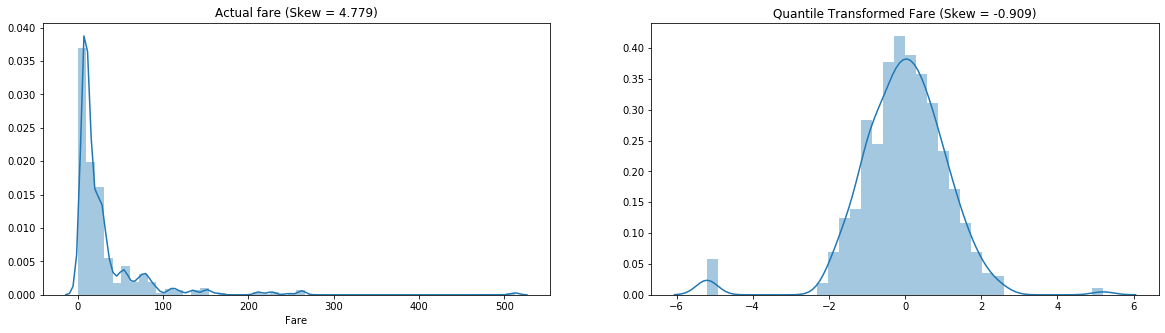

In [142]:
from sklearn.preprocessing import QuantileTransformer

rng = np.random.RandomState(115)

qt = QuantileTransformer(n_quantiles = 500, output_distribution = 'normal', random_state = rng)

qt_fare = qt.fit_transform(titanic[['Fare']])
skew_qt = skew(qt_fare)

fig, ax = plt.subplots(1, 2, figsize=(20,5))

sns.distplot(fare, ax=ax[0])
ax[0].set_title("Actual fare (Skew = %.3f)"%skew_fare)

sns.distplot(qt_fare, ax=ax[1])
ax[1].set_title("Quantile Transformed Fare (Skew = %.3f)"%skew_qt)

plt.show()